# CURSO VISUALIZACIÓN DE LA INFORMACIÓN
## TRABAJO PRÁCTICO 1

### Ejercicio 2
Analice los informes obtenidos de los datasets del ejercicio anterior y realice un
informe de las presentaciones, con conclusiones, y si considera que las visualizaciones son
efectivas y de fácil interpretación, etc. y ¿Cómo las mejorarían?

## Transacciones

### Lectura DataSet transacciones

In [1]:
import pandas as pd

data_trans = pd.read_csv("transacciones.csv") 

In [2]:
# Convertir la columna 'date_added' a tipo date
data_trans['Date'] = pd.to_datetime(data_trans['Date'],  dayfirst=True, errors='coerce')
data_trans.head(5)

,Id,Date,Company Name,Transaction Amount
0,1,2021-04-20,DIRECTV,97345310
1,2,2021-11-28,Aysa,17375907
2,3,2021-03-17,Claro,91148233
3,4,2021-05-19,Metrogas,36578482
4,5,2021-10-14,Cablevision Fibertel,10918024


### Analis del informe

Se procede a analizar cada una de las secciones.

#### 1) Tabla: Monto total de las transacciones por compañia.

In [23]:
# Agrupar por 'Company Name' y sumar los montos de las transacciones
total_transactions_per_company = data_trans.groupby('Company Name')['Transaction Amount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
total_transactions_per_company.columns = ['Company Name', 'Total Transaction Amount']

# Ordenar el DataFrame por 'Total Transaction Amount' en orden descendente
total_transactions_per_company_sorted = total_transactions_per_company.sort_values(by='Total Transaction Amount', ascending=False)


# Mostrar el resultado
total_transactions_per_company_sorted

,Company Name,Total Transaction Amount
9,Movistar,8250775412
7,Flow,4738853026
0,Andesat,4460644840
1,Aysa,4247371598
5,Edenor,4098861077
11,Personal,4081126650
8,Metrogas,3945514475
3,Claro,3505152332
6,Edesur,3488051928
10,Mundo Satelital,3440771772


In [24]:
import pandas as pd

df = pd.DataFrame(total_transactions_per_company_sorted)

# Estilo de la tabla
def color_rows(row):
    # Obtener el índice de la fila
    idx = row.name
    if df.index.get_loc(idx) % 2 == 0:
        return ['background-color: lightgreen; color: black'] * len(row)
    else:
        return ['background-color: lightyellow; color: black'] * len(row)

styled_df = df.style.apply(color_rows, axis=1)
styled_df = styled_df.set_table_styles(
    [{'selector': 'thead th',
      'props': [('background-color', 'green'),
                ('color', 'white')]}])

# Mostrar la tabla estilizada
styled_df

,Company Name,Total Transaction Amount
9,Movistar,8250775412
7,Flow,4738853026
0,Andesat,4460644840
1,Aysa,4247371598
5,Edenor,4098861077
11,Personal,4081126650
8,Metrogas,3945514475
3,Claro,3505152332
6,Edesur,3488051928
10,Mundo Satelital,3440771772


Si bien los datos pueden ser redundantes porque luego se los muestra por diagramas, creo interesante conservar la taba para mostrar todos los valores y luego en las grafica realizar un top 5.

#### 2) Diagrama de barras: Monto total de las transacciones por compañia.

In [58]:
# Invertir el orden del DataFrame
total_transactions_per_company_sorted = total_transactions_per_company_sorted[::-1].head()
total_transactions_per_company_sorted

,Company Name,Total Transaction Amount
5,Edenor,4098861077
1,Aysa,4247371598
0,Andesat,4460644840
7,Flow,4738853026
9,Movistar,8250775412


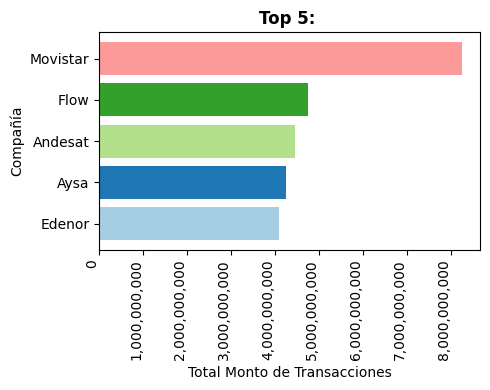

In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Obtener la paleta de colores 'Pastel2'
colors = sns.color_palette('Paired', len(total_transactions_per_company_sorted))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(5, 4))
bars = plt.barh(total_transactions_per_company_sorted['Company Name'], total_transactions_per_company_sorted['Total Transaction Amount'], color=colors)

# Añadir título y etiquetas
plt.title('Top 5: ', fontsize=12, fontweight='bold')
plt.xlabel('Total Monto de Transacciones', fontsize=10)
plt.ylabel('Compañía', fontsize=10)
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas en el eje x para mayor legibilidad

# Formatear el eje X para mostrar los números completos
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Me parece mejor asignar un color particular a cada compañia.

#### 3) Diagrama de torta: Monto total de las transacciones por compañia.

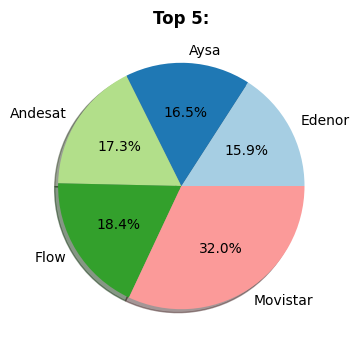

In [77]:
from matplotlib import pyplot as plt
import seaborn as sns

# Obtener la paleta de colores 'Pastel2'
colors = sns.color_palette('Paired', len(total_transactions_per_company_sorted))

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(4, 4))  # Ajusta el tamaño del gráfico según tus necesidades
wedges, texts, autotexts = ax.pie(
    total_transactions_per_company_sorted['Total Transaction Amount'],  # Usar la columna de montos totales
    labels=total_transactions_per_company_sorted['Company Name'],  # Usar la columna de nombres de compañías
    autopct='%1.1f%%', 
    shadow=True,
    colors=colors  # Aplicar los colores de la paleta 'Pastel2'
)

plt.title("Top 5:", fontdict={'fontsize': 12, 'fontweight': 'bold'})

# Mostrar el gráfico
plt.show()


En el diagrama original existe una porción llamada 'others' que agrupa a las porciones inferiores; pero en forma contraproducente esto desproporciona el tamaño relativo, al observar una porción grande para una porción de información no relevante.